In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

In [2]:
df = pd.read_excel(r"C:\Users\HP\Downloads\python learning\Vehicle Collision.xlsx")

In [3]:
# Display the first few rows of the dataset
df.head()


,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10253606,4230743.0,2019-10-24,19:15:00,84bcb3a7-d201-4c61-9e30-fe29268c1074,Occupant,Injured,19143343.0,27.0,Not Ejected,...,Back,Driver,Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Driver,NaN,NaN,M
1,10248708,4229547.0,2019-10-26,01:15:00,a8904763-2870-42f3-865c-b53d8e5156e2,Pedestrian,Injured,NaN,24.0,NaN,...,Shoulder - Upper Arm,NaN,NaN,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Crossing With Signal,None Visible,Pedestrian,Unspecified,Unspecified,F
2,10254556,4230715.0,2019-10-26,08:50:00,1a085543-ae9d-4a69-8cd0-fb7b33380a8b,Bicyclist,Injured,19143832.0,42.0,Not Ejected,...,Knee-Lower Leg Foot,Driver,Unknown,NaN,NaN,None Visible,Driver,NaN,NaN,M
3,10250834,4230376.0,2019-10-26,19:40:00,f58fc41f-497e-4f30-bf49-a9a80adec8b2,Bicyclist,Injured,19141949.0,36.0,Not Ejected,...,Back,Driver,NaN,NaN,NaN,Internal,Driver,NaN,NaN,M
4,10252474,4229773.0,2019-10-26,16:50:00,4bf13d12-8d7a-4cb0-997f-dd6a8b1adca6,Occupant,Injured,19142773.0,50.0,Not Ejected,...,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F


In [4]:
# Display the last few rows of the dataset
df.tail()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
230655,10091762,4193169.0,2019-08-22,14:00:00,7a710fd4-d131-4f2f-a7d9-942c34a60fc2,Occupant,Injured,19062202.0,56.0,Not Ejected,...,Back,"Left rear passenger, or rear passenger on a bi...",Lap Belt & Harness,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,F
230656,"""error"" : true",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230657,"""message"" : ""Internal error""",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230658,"""status"" : 500",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230659,},NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.loc[0])

UNIQUE_ID                                            10253606
COLLISION_ID                                        4230743.0
CRASH_DATE                                2019-10-24 00:00:00
CRASH_TIME                                           19:15:00
PERSON_ID                84bcb3a7-d201-4c61-9e30-fe29268c1074
PERSON_TYPE                                          Occupant
PERSON_INJURY                                         Injured
VEHICLE_ID                                         19143343.0
PERSON_AGE                                               27.0
EJECTION                                          Not Ejected
EMOTIONAL_STATUS                                    Conscious
BODILY_INJURY                                            Back
POSITION_IN_VEHICLE                                    Driver
SAFETY_EQUIPMENT                           Lap Belt & Harness
PED_LOCATION                                              NaN
PED_ACTION                                                NaN
COMPLAIN

In [5]:
# Check for missing values
df.isnull().sum()



UNIQUE_ID                     0
COLLISION_ID                  4
CRASH_DATE                    4
CRASH_TIME                    4
PERSON_ID                     7
PERSON_TYPE                   4
PERSON_INJURY                 4
VEHICLE_ID                48723
PERSON_AGE                  997
EJECTION                 127873
EMOTIONAL_STATUS         103742
BODILY_INJURY            103701
POSITION_IN_VEHICLE      127754
SAFETY_EQUIPMENT         140540
PED_LOCATION             204368
PED_ACTION               204430
COMPLAINT                103687
PED_ROLE                 103687
CONTRIBUTING_FACTOR_1    205452
CONTRIBUTING_FACTOR_2    205477
PERSON_SEX               103768
dtype: int64

In [6]:
# Check for duplicates in Customer_id
df.duplicated().sum()


0

In [7]:
# Checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230660 entries, 0 to 230659
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   UNIQUE_ID              230660 non-null  object        
 1   COLLISION_ID           230656 non-null  float64       
 2   CRASH_DATE             230656 non-null  datetime64[ns]
 3   CRASH_TIME             230656 non-null  object        
 4   PERSON_ID              230653 non-null  object        
 5   PERSON_TYPE            230656 non-null  object        
 6   PERSON_INJURY          230656 non-null  object        
 7   VEHICLE_ID             181937 non-null  float64       
 8   PERSON_AGE             229663 non-null  float64       
 9   EJECTION               102787 non-null  object        
 10  EMOTIONAL_STATUS       126918 non-null  object        
 11  BODILY_INJURY          126959 non-null  object        
 12  POSITION_IN_VEHICLE    102906 non-null  obje

In [20]:
df.describe()

,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,2.306560e+05,1.819370e+05,229663.000000
mean,2.824113e+06,1.567930e+07,36.474029
std,1.497211e+06,3.051295e+06,84.924692
min,3.900000e+01,6.029470e+05,-997.000000
25%,2.812695e+06,1.353522e+07,23.000000
50%,3.474966e+06,1.714574e+07,33.000000
75%,3.873819e+06,1.795996e+07,49.000000
max,4.695378e+06,2.058575e+07,9999.000000


In [6]:
def missing_values_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    # Filter columns with missing values
    missing_percentage = missing_percentage[missing_percentage > 0]
    return missing_percentage

# Calculate the percentage of missing values
missing_percentage = missing_values_percentage(df)

# Print the percentage of missing values
print(missing_percentage)

COLLISION_ID              0.001734
CRASH_DATE                0.001734
CRASH_TIME                0.001734
PERSON_ID                 0.003035
PERSON_TYPE               0.001734
PERSON_INJURY             0.001734
VEHICLE_ID               21.123298
PERSON_AGE                0.432238
EJECTION                 55.437874
EMOTIONAL_STATUS         44.976155
BODILY_INJURY            44.958380
POSITION_IN_VEHICLE      55.386283
SAFETY_EQUIPMENT         60.929507
PED_LOCATION             88.601405
PED_ACTION               88.628284
COMPLAINT                44.952311
PED_ROLE                 44.952311
CONTRIBUTING_FACTOR_1    89.071360
CONTRIBUTING_FACTOR_2    89.082199
PERSON_SEX               44.987427
dtype: float64


### Outlier Detection

Outliers detected in COLLISION_ID:
Int64Index([   325,    335,    404,    405,    410,    432,    442,    443,
               452,    460,
            ...
            230574, 230602, 230606, 230607, 230609, 230619, 230627, 230642,
            230647, 230654],
           dtype='int64', length=56873)
Outliers detected in VEHICLE_ID:
Int64Index([ 20114,  22342,  22449,  25858,  28755,  41765,  42177,  46766,
             46877,  51666,  53716,  53893,  55767,  58110,  58415,  60229,
             60735,  71079,  71828,  85081,  92017, 101946, 106558, 109737,
            112720, 116973, 120935, 129575, 130962, 155781, 156167, 159442,
            160513, 168343, 175427, 177333, 177811, 180891, 181834, 191469,
            201671, 211004, 211387, 212224, 217977, 219496, 221224, 223253],
           dtype='int64')
Outliers detected in PERSON_AGE:
Int64Index([   418,    914,   1630,   2073,   2119,   2282,   2582,   2585,
              2718,   2775,
            ...
            227359, 227392, 228

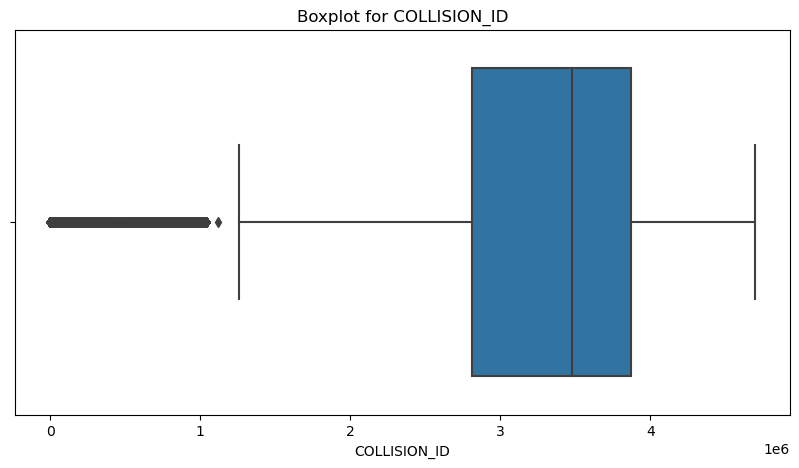

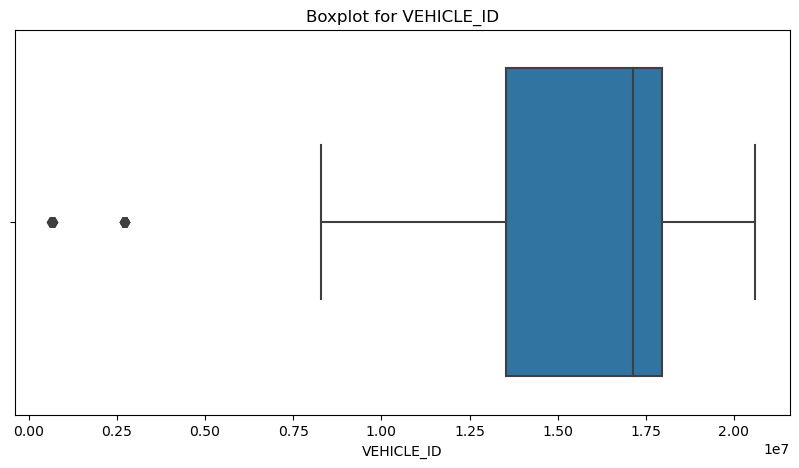

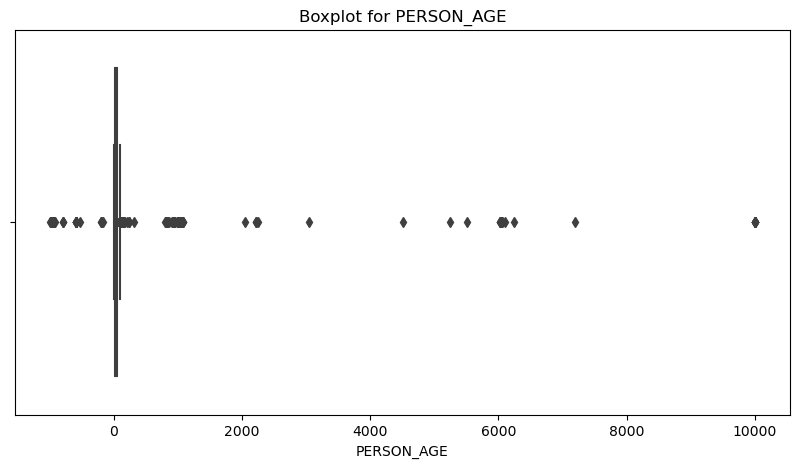

In [7]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers

# Detect outliers
outliers = detect_outliers_iqr(df)

# Print outliers for each column
for column, outlier_indices in outliers.items():
    print(f"Outliers detected in {column}:")
    print(outlier_indices)

# Visualize outliers
def plot_outliers(data, column):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Plot outliers for each numerical column
for column in df.select_dtypes(include=[np.number]).columns:
    plot_outliers(df, column)

### Column Dropping

In [9]:
df = df.drop(columns=['PERSON_ID',"UNIQUE_ID","COLLISION_ID","CRASH_DATE","CRASH_TIME","VEHICLE_ID","PED_LOCATION","PED_ACTION","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2"])

In [10]:
df.head()

,PERSON_TYPE,PERSON_INJURY,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,COMPLAINT,PED_ROLE,PERSON_SEX
0,Occupant,Injured,27.0,Not Ejected,Conscious,Back,Driver,Lap Belt & Harness,Complaint of Pain or Nausea,Driver,M
1,Pedestrian,Injured,24.0,NaN,Conscious,Shoulder - Upper Arm,NaN,NaN,None Visible,Pedestrian,F
2,Bicyclist,Injured,42.0,Not Ejected,Unknown,Knee-Lower Leg Foot,Driver,Unknown,None Visible,Driver,M
3,Bicyclist,Injured,36.0,Not Ejected,Conscious,Back,Driver,NaN,Internal,Driver,M
4,Occupant,Injured,50.0,Not Ejected,Conscious,Head,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,Complaint of Pain or Nausea,Passenger,F
